<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       522 non-null    float64
 1   TM      522 non-null    float64
 2   Tm      522 non-null    float64
 3   H       522 non-null    float64
 4   PP      522 non-null    float64
 5   VV      522 non-null    float64
 6   V       522 non-null    float64
 7   VM      522 non-null    float64
 8   PM_2_5  522 non-null    float64
dtypes: float64(9)
memory usage: 36.8 KB


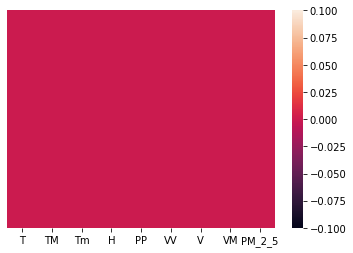

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reading csv file
combine_data= pd.read_csv('cleaned_data.csv')
# checking no of numerical features
combine_data.info()
# To get statistical information
combine_data.describe()
# Now we need check null values
combine_data.isnull()
combine_data.isnull().sum()
# we also visualize null with seaborn
sns.heatmap(combine_data.isnull(),yticklabels=False)
plt.savefig('heatmap')

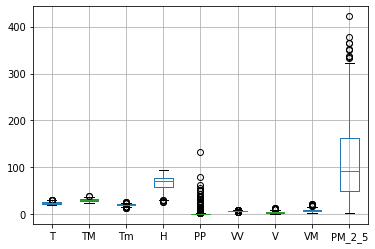

<Figure size 432x288 with 0 Axes>

In [5]:
# checking outliers 
combine_data.boxplot()
plt.show()
plt.savefig('boxplot')

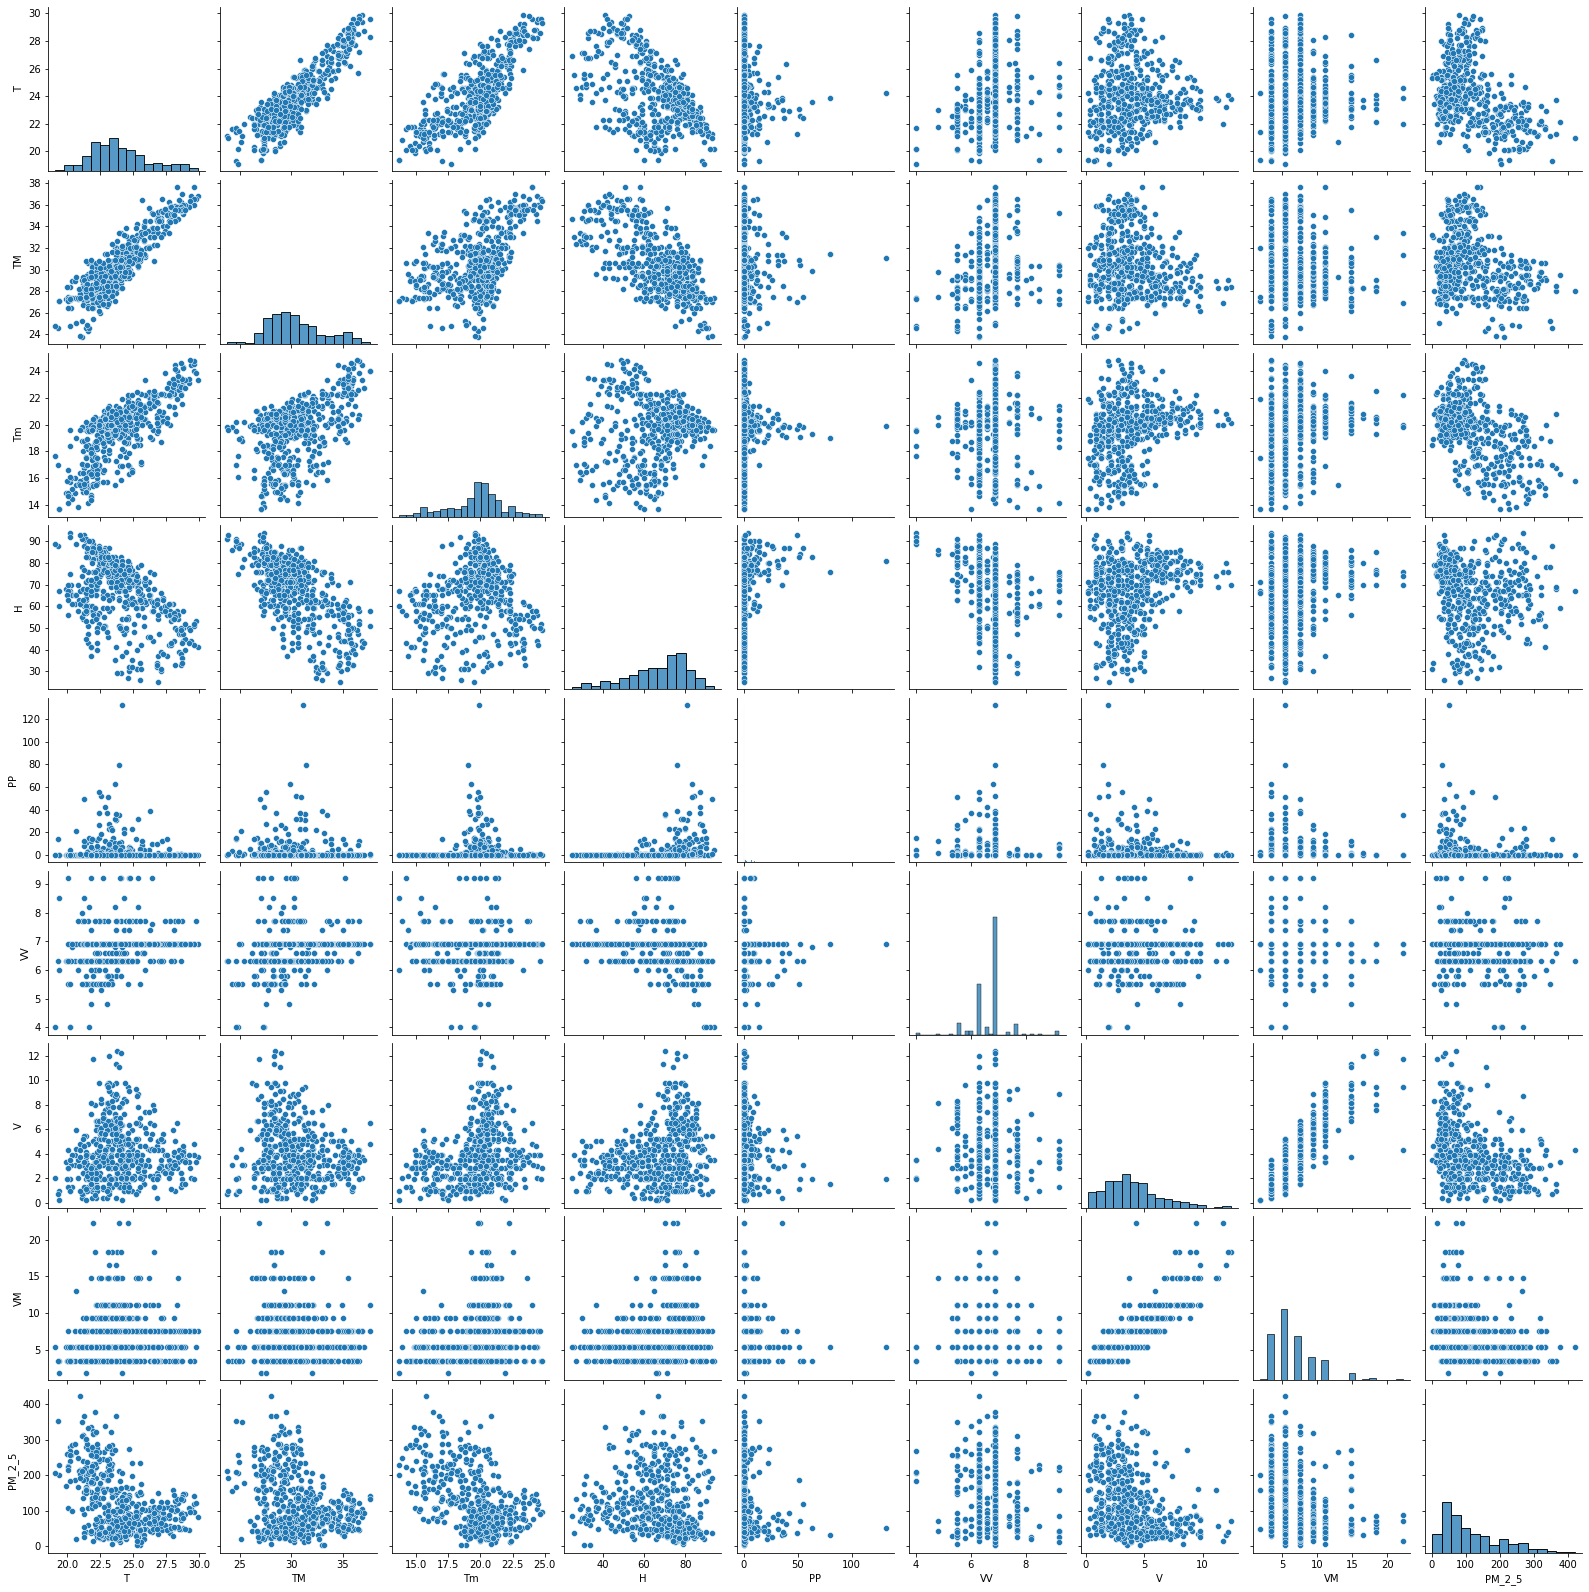

In [6]:
# Multivariate anlaysis
sns.pairplot(combine_data)
plt.savefig('Multivariate')


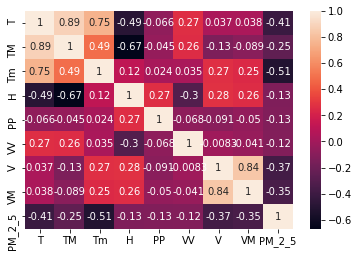

In [7]:
# We also check the corelation between dependent and independent feature
combine_data.corr()
relation =combine_data.corr()
relation_index=relation.index
sns.heatmap(combine_data[relation_index].corr(),annot=True)
plt.savefig('correlation')

In [8]:
X = combine_data.iloc[:, :-1].values
y = combine_data.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [13]:
ind=['T','TM','Tm','SLP','H','VV','V','VM']

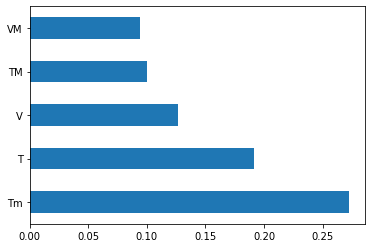

<Figure size 432x288 with 0 Axes>

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
reg.feature_importances_
feat_importances = pd.Series(reg.feature_importances_, index=ind)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()
plt.savefig('importance')